In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# Import the train datasets

In [2]:
X_train = pd.read_csv("A_Normalised_train_data.csv",index_col=0)
Y_train = pd.read_csv("A_Log_sales_train.csv",index_col=0)

# Setup Pipeline

In [3]:
pca=PCA()
SLR = LinearRegression()

In [4]:
# Step 1: PCA
# Step 2: Model
pipe = Pipeline(steps=[("pca",pca),("SLR",SLR)])

In [5]:
param_grid = {
    "pca__n_components": [5, 10, 30, 45, 60, 100 ,150 ,170]
}

# Setup GridSearch

In [6]:
score_metric = 'neg_mean_squared_error'
search = GridSearchCV(pipe,param_grid,
                      n_jobs=-1,
                      cv=10,
                      scoring=score_metric)

In [7]:
search.fit(X_train,Y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('SLR', LinearRegression())]),
             n_jobs=-1,
             param_grid={'pca__n_components': [5, 10, 30, 45, 60, 100, 150,
                                               170]},
             scoring='neg_mean_squared_error')

In [8]:
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=-0.785):
{'pca__n_components': 100}


In [9]:
df = pd.DataFrame(search.cv_results_)
df = df.sort_values(by=['rank_test_score'])
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
5,0.182976,0.018971,0.012497,0.006249,100,{'pca__n_components': 100},-0.732836,-0.711228,-8.678967e-01,-0.820234,-9.316073e-01,-7.183374e-01,-0.679300,-7.689841e-01,-0.829959,-7.939304e-01,-7.854312e-01,7.466088e-02,1
4,0.124109,0.015920,0.009377,0.007878,60,{'pca__n_components': 60},-0.752878,-0.741900,-9.103591e-01,-0.839444,-9.856893e-01,-7.266415e-01,-0.675529,-8.120874e-01,-0.838689,-8.527597e-01,-8.135977e-01,8.789977e-02,2
3,0.112474,0.015307,0.014059,0.008413,45,{'pca__n_components': 45},-0.784760,-0.787974,-9.409762e-01,-0.860142,-1.025954e+00,-7.219351e-01,-0.730888,-8.381549e-01,-0.870633,-9.256142e-01,-8.487032e-01,9.181393e-02,3
2,0.089042,0.012201,0.010934,0.007158,30,{'pca__n_components': 30},-0.952587,-0.910722,-1.042337e+00,-0.986751,-1.101241e+00,-8.285635e-01,-0.802499,-9.309592e-01,-0.956929,-9.899356e-01,-9.502524e-01,8.532771e-02,4
1,0.072645,0.007028,0.009373,0.007653,10,{'pca__n_components': 10},-0.956312,-0.973192,-1.121131e+00,-1.067259,-1.174849e+00,-7.943545e-01,-0.840134,-9.290861e-01,-0.976023,-9.857485e-01,-9.818089e-01,1.107883e-01,5
0,0.070787,0.009106,0.013231,0.008893,5,{'pca__n_components': 5},-1.171934,-1.121137,-1.244755e+00,-1.430049,-1.479115e+00,-9.684188e-01,-1.190392,-1.116715e+00,-1.173831,-1.122321e+00,-1.201867e+00,1.439376e-01,6
6,0.126533,0.010935,0.012497,0.009372,150,{'pca__n_components': 150},-0.535833,-0.554218,-1.481674e+22,-0.631670,-1.037960e+23,-5.823736e+23,-0.566493,-3.467720e+23,-0.666246,-4.128813e+23,-1.460640e+23,2.067673e+23,7
7,0.112474,0.009373,0.009373,0.007653,170,{'pca__n_components': 170},-0.525045,-0.566361,-3.021293e+24,-0.649931,-5.397617e+22,-7.668862e+24,-0.575569,-1.778556e+25,-0.678793,-6.527168e+25,-9.380137e+24,1.940307e+25,8


# Best Hyperparameter

In [10]:
parms = pd.DataFrame(df['params'])
for i in parms.iloc[0]:
    print(i)

{'pca__n_components': 100}


# Evaluate Model $log(Sales)$

In [11]:
best_pca =100

In [12]:
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X_train,Y_train,test_size=0.2,random_state=132)


In [13]:
pca1 = PCA(n_components=100)
pca1.fit(X_train1)
PX_train1 = pca1.transform(X_train1)
SLR1 = LinearRegression()
SLR1.fit(PX_train1,Y_train1)

LinearRegression()

In [14]:
pca2 = PCA(n_components=100)
pca2.fit(X_test1)
PX_test1 = pca2.transform(X_test1)

In [15]:
MSE(SLR1.predict(PX_test1),Y_test1)

2.1358113307138153

In [16]:
result = pd.DataFrame(np.exp(Y_test1))

In [17]:
result["Predicted_sales"] = np.exp(SLR1.predict(PX_test1))

In [18]:
MSE(result["sales"],result["Predicted_sales"])

1257.209273307083

# Model using original sales data

In [19]:
OY_train = pd.read_csv("A_sales_train.csv",index_col=0)

In [20]:
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(X_train,OY_train,test_size=0.2,random_state=132)

In [21]:
pca3 = PCA(n_components=100)
pca3.fit(X_train2)
PX_train2 = pca3.transform(X_train2)
SLR2 = LinearRegression()
SLR2.fit(PX_train2,Y_train2)

LinearRegression()

In [22]:
pca4 = PCA(n_components=100)
pca4.fit(X_test2)
PX_test2 = pca4.transform(X_test2)

In [23]:
MSE(SLR2.predict(PX_test2),Y_test2)

1865.1953941713607

#### Notably model trained on log(Sales) has lower out-of-sample MSE than model with unmodified Sales

# Inventory Decision

In [24]:
residue = result['sales']-result['Predicted_sales']

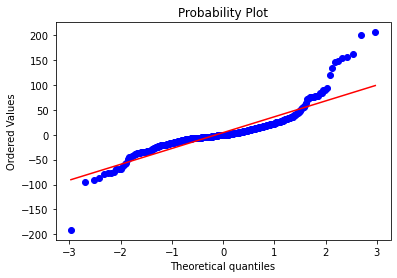

In [25]:
import scipy
scipy.stats.probplot(residue, dist="norm", plot=plt)
plt.show()

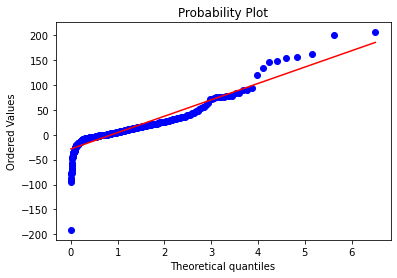

In [26]:
scipy.stats.probplot(residue, dist="expon", plot=plt)
plt.show()

In [27]:
#Assume is normal with
s = residue.std()

In [28]:
import scipy.stats as sct

In [29]:
Price=20
Cost=12
Salvage=8
Over=Cost - Salvage
Under=Price - Cost
Over, Under

(4, 8)

In [30]:
opt_dec_N=np.ceil(sct.norm.ppf(Under/(Under+Over))*s + result['Predicted_sales'])

In [31]:
opt_dec_E=np.ceil((-result['Predicted_sales'])*np.log(1-(Under/(Under+Over))))

# Out-of-samples Profit

In [32]:
#max profit for test data set
max_profit = result['sales'].sum()*(Price-Cost)
max_profit

82096.0

In [33]:
def profit(demand,inv):
    return (Price-Salvage)*np.minimum(demand,inv)-(Cost-Salvage)*inv

In [34]:
profit_lst_N = profit(result['sales'],opt_dec_N)
profit_lst_N.sum()

21056.0

In [35]:
profit_lst_E = profit(result['sales'],opt_dec_E)
profit_lst_E.sum()

20756.0